# Predicting heart disease using machine learning
* This notebooks looks into various python-based machine learning and data science libraries in an attept to build ML model capable of predicting whether a person has heart disease or not based on their medical attributes.

we are going to follow below approach :
* Problem defination - 
What we exactly want to achieve ? Here we want to know if patient has heart disease or not.
* data-
you can get data publicly.( your client will provide data to you if you are working in a company or as a freelancer.(put dataset link.)
* evaluation-
If we can reach 95% accuracy in predicting whether patient has heart disease or not. we will use this model.
* features

create Feature Dictionary

      * age: age in years
      * sex: sex (1 = male; 0 = female)
      * cp: chest pain type
          -- Value 1: typical angina
          -- Value 2: atypical angina
          -- Value 3: non-anginal pain
          -- Value 4: asymptomatic
      * trestbps: resting blood pressure (in mm Hg on admission to the hospital)
      * chol: serum cholestoral in mg/dl
      * fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * restecg: resting electrocardiographic results
             -- Value 0: normal
             -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
             -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
      * thalach: maximum heart rate achieved
      * exang: exercise induced angina (1 = yes; 0 = no)
      * oldpeak = ST depression induced by exercise relative to rest
      * slope: the slope of the peak exercise ST segment
      * ca: number of major vessels (0-3) colored by flourosopy
      * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
      * num: diagnosis of heart disease (angiographic disease status)
            -- Value 0: < 50% diameter narrowing
            -- Value 1: > 50% diameter narrowing
            (in any major vessel: attributes 59 through 68 are vessels)
* modeling
* experimentation

In [1]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\admin\anaconda3\lib\site-packages (0.24.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#prepairing the tools (Import all the tools)
#Regular EDA (Exploratory data analysis) and ploting tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# As we want our plots appear inside the notebook
%matplotlib inline    

# models from sci-kit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import plot_roc_curve #Reciever Operating Characteristic curve





* **LOAD DATA**

In [3]:
df=pd.read_csv("heart-disease-Copy1.csv")

In [4]:
df.shape  #It has 303 rows and 14 columns

(303, 14)

# Data Exploration (EDA-Exploratory Data Analysis)

* The goal here is to find out more about data and become a subject matter expert on the dataset youre working with.

1.What questions are you trying to solve ?

2.What kind of data do we have and how do we treat different types ?

3.Whats missing from the data and how do you deal with it.

4.Where are the outliers and why should you care about them.

5.How can you add,change or remove features to get more out of data.


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.target.value_counts()  #we had used this in door column.

1    165
0    138
Name: target, dtype: int64

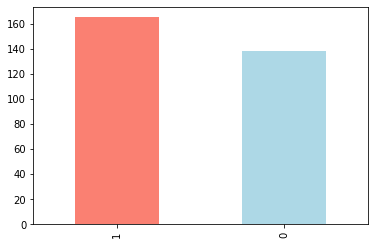

In [9]:
#We are compairing target attributes 1 and 0 using bar plot
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart  disease frequency according to sex 

In [13]:
df.sex.value_counts() #1-male,0-female.

1    207
0     96
Name: sex, dtype: int64

In [14]:
#Compare target column with sex column
target_sex=pd.crosstab(df.target,df.sex)

In [15]:
target_sex

sex,0,1
target,,
0,24,114
1,72,93


In [16]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


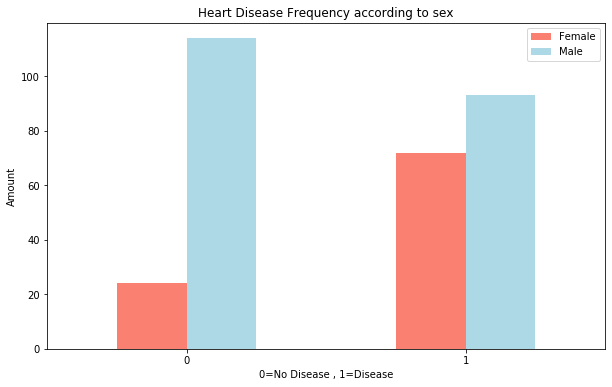

In [19]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency according to sex")
plt.xlabel("0=No Disease , 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]) # Always 0 first and 1 after it.
plt.xticks(rotation=0); # TICKS MEANS THOSE ONE AND 0 on x axis

# Age vs Max Heart Rate for Heart Disease

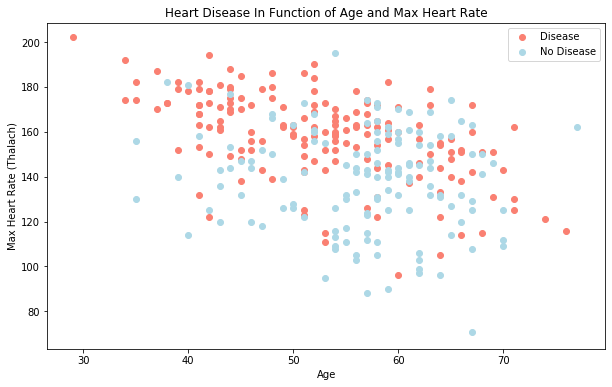

In [17]:
plt.figure(figsize=(10,6))
#plotting a scatter plot
plt.scatter(df.age[df.target==1], #It means all age values where target is 1(has heart disease).
           df.thalach[df.target==1], #It means all thalach values where target is 1.
           c="salmon");

#YOU can see young people have higher heart rate as compared to old people.
#Scatter with no heart disease:
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
#add some helpful info
plt.title("Heart Disease In Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.legend(["Disease","No Disease"]);

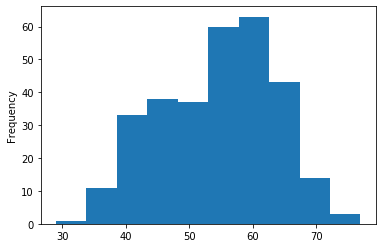

In [18]:
# Check the distribution of age column with Histogram.
df.age.plot.hist();
# As you can see in 30's people usually dont have heart disease so there are less samples  of age 30-35 and it keeps increasing from 40
# till 65. Finding patterns like this in our dataset

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
pd.crosstab(df.target,df.fbs) # (1 = true; 0 = false)

fbs,0,1
target,,
0,116,22
1,142,23


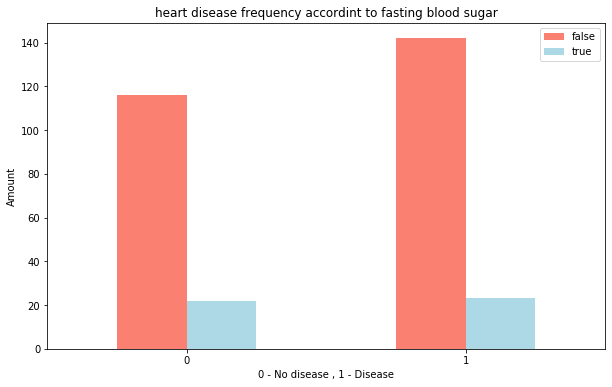

In [21]:
pd.crosstab(df.target,df.fbs).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease frequency accordint to fasting blood sugar")
plt.xlabel("0 - No disease , 1 - Disease")
plt.ylabel("Amount")
plt.legend(["false","true"])
plt.xticks(rotation=0);

#  Heart Disease Frequency per Chest Pain Type
* cp: chest pain type
          -- Value 0: typical angina (chest pain related decrease blood supply to the heart.
          -- Value 1: atypical angina (chest pain not related to heart)
          -- Value 2: non-anginal pain  (typically esophageal spasms- non heart related)
          -- Value 3: asymptomatic ( chest pain not showing signs of disease)
    

In [22]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


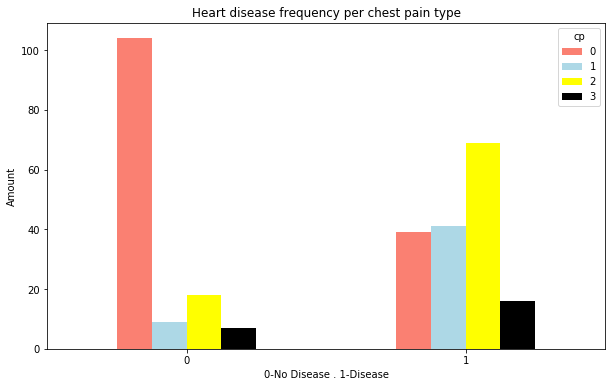

In [23]:
pd.crosstab(df.target,df.cp).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue","yellow","black"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("0-No Disease . 1-Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [24]:
# Make a CORRELATION MATRIX
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


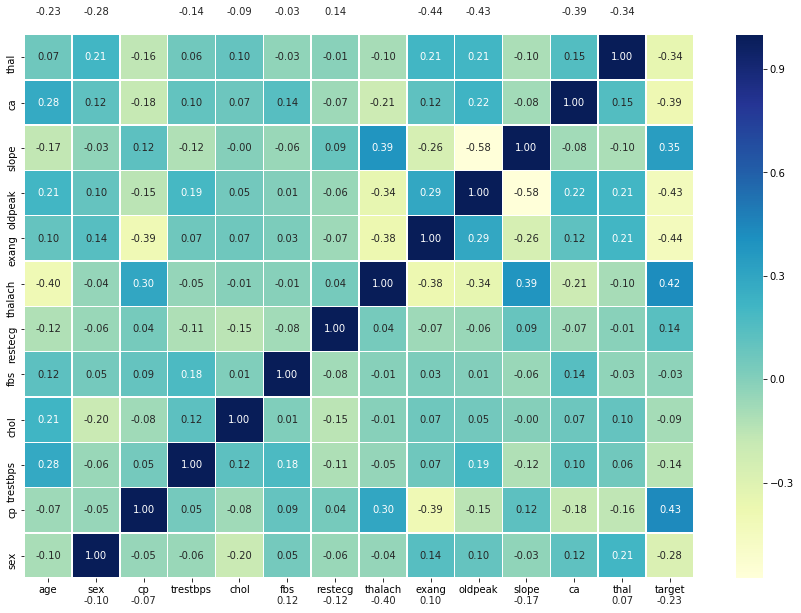

In [25]:
#lets make our correlation matrix a little pretier.
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True, #It would be blank if annot is set to False 
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu"); 
b,t=ax.get_ylim()
ax.set_ylim(t + 0.5,b - 0.5);
#we dont want after 2nd decimal

# Modeling 

In [26]:
x=df.drop("target",axis=1)
y=df.target

In [27]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [30]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3


In [31]:
y_train

295    0
135    1
150    1
190    0
82     1
      ..
164    1
293    0
245    0
95     1
155    1
Name: target, Length: 242, dtype: int64

# Now its time to build ML model
 We are going to try three different models :
 * Logistic Regression
 * k Nearest Neighbors Classifiers
 * Random Forest Classifier
 

In [32]:
#Creating a models dictionary
models= {"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(n_estimators=100)}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning model
    model=Selects model from Dictionary of different models.
    x_train and x_test= Train and Test data (features , no labels)
    y_train and y_test = Training and testing labels (target variable)
    """
    #Set Random seed
    np.random.seed(42)
    models_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        models_score[name]=model.score(x_test,y_test)
    return models_score
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

        

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8360655737704918}

# Model Comparison

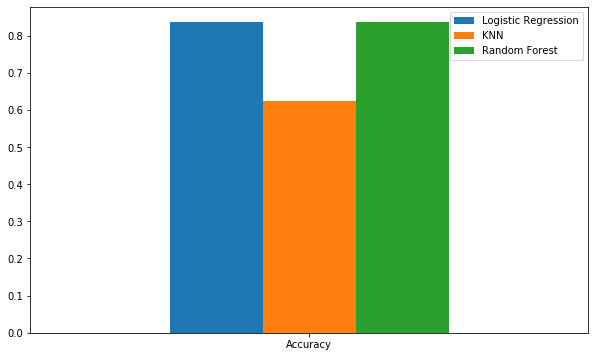

In [34]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar(figsize=(10,6)); # bar plot the dictionary 
plt.xticks(rotation=0);

In [35]:
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.836066,0.622951,0.836066


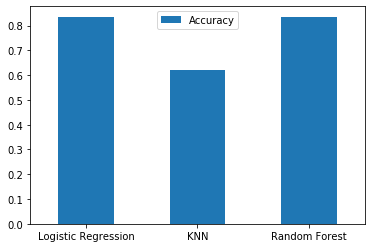

In [36]:
model_compare.T.plot.bar() #Rows will become columns and vice versa.
plt.xticks(rotation=0);

 Now we have got our baseline model .. and we know models first predictions arent always best ,we should perform some tuning to improve our model and get the best result we can.
 **Lets look at the following :**
 * Hyperparameter tuning
 * Feature importance
 * Confusion matrix
 * classification report
 * Precision
 * Recall
 * F1
 * Cross validation
 * Area under curve
 * ROC curve

In [37]:
#Lets Tune KNN
train_scores=[]
test_scores=[]
# Create a list for different values for n_neighbors
neighbors= range(1,21)
# Setup KNN instances
knn=KNeighborsClassifier()
# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorith
    knn.fit(x_train,y_train)
    #Update training_list  scores
    train_scores.append(knn.score(x_train,y_train))
    # Update testing list scores
    test_scores.append(knn.score(x_test,y_test))

    

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.78099173553719,
 0.7644628099173554,
 0.756198347107438,
 0.7355371900826446,
 0.7396694214876033,
 0.7231404958677686,
 0.7024793388429752,
 0.7148760330578512,
 0.7231404958677686,
 0.7272727272727273,
 0.7107438016528925,
 0.7024793388429752,
 0.6859504132231405,
 0.71900826446281,
 0.7024793388429752,
 0.7148760330578512,
 0.7024793388429752]

In [39]:
test_scores

[0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.639344262295082,
 0.6885245901639344,
 0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082]

Maximum score on test data  using Knn algorithm is : 70.49% 


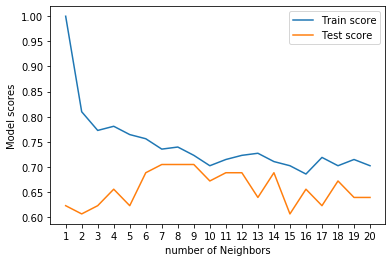

In [40]:

plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("number of Neighbors")
plt.ylabel('Model scores')
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Maximum score on test data  using Knn algorithm is : {max(test_scores) * 100:.2f}% ")

We gonna tune hyperparameters using RandomizedCV() of :
* LogisticRegression()
* RandomForestClassifier()


In [41]:
log_regrid={"C":np.logspace(-4,4,20),
            "solver":["liblinear"]
           }
RFC_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


In [42]:
#Setup our variable to tune the hyperparameters using RandomizedSearchCV
np.random.seed(42)
log_reg_rs=RandomizedSearchCV(LogisticRegression(),
                             log_regrid,
                             cv=5,
                             n_iter=20, 
                             verbose=True)

In [43]:
log_reg_rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [45]:
#Lets evaluate and check the score
log_reg_rs.score(x_test,y_test)

0.8360655737704918

In [46]:
#Now lets tune RandomForestClassifier() using RandomizedSearchCV()
np.random.seed(42)
random_rs=RandomizedSearchCV(RandomForestClassifier(),
                             RFC_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
random_rs.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
random_rs.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [48]:
# Now evaluate the model using these best Hyperparameters. (DEfaultly it uses the best)
random_rs.score(x_test,y_test)

0.819672131147541

# Hyperparameter Tuning with GridSearchCV
**Since our Logistic Regression model povides highest accuracy , we will try to improve it more using GridSearchCV**

In [49]:
#HERE I AM TUNING HYPERPARAMETERS BASED ON MY RESEARCH. SO LETS COMPARE MY RESEARCHED HYPEREPARAMETERS AND DANIELS HYPERPARAMETERS AFFECT ON THE MODEL.
from sklearn.model_selection import GridSearchCV
#grid = dict(solver=solvers,penalty=penalty,C=c_values) we can create dictionary like this as well.
log_regrid_me={"C":[100, 10, 1.0, 0.1, 0.01],# Controls Penalty strength.
               "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
               "penalty":[None,"l1","l2","elasticnet"]
              }
log_reg_gs_me=GridSearchCV(LogisticRegression(),
                          log_regrid_me,
                          cv=5,
                          n_jobs=-1 ,
                          verbose=True)
log_reg_gs_me.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.82253401        nan 0.69005102 0.81836735 0.83078231
 0.82253401 0.69013605 0.69005102        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.82670068        nan 0.69005102
 0.81836735 0.83069728 0.83078231 0.69013605 0.69005102        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.83078231
        nan 0.69005102 0.83078231 0.83486395 0.83486395 0.69013605
 0.69005102        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.78903061        nan 0.69005102 0.82653061 0.81828231
 0.81828231 0.69013605 0.69005102        nan        n

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [50]:
log_reg_gs_me.best_score_

0.8348639455782312

In [51]:
log_reg_gs_me.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [52]:
log_reg_gs_me.score(x_test,y_test)

0.8360655737704918

In [53]:
#Lets do Hyperparameter Tuning with Daniels Hyperparameters.
log_regrid2={"C":np.logspace(-4,4,30),
            "solver":["liblinear"]}
log_reg_gs=GridSearchCV(LogisticRegression(),
                       log_regrid2,
                       cv=5,
                       verbose=True)
log_reg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
log_reg_gs.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [55]:
log_reg_gs.best_score_

0.8348639455782312

In [56]:
log_reg_gs.score(x_test,y_test)

0.8360655737704918

# Evaluating our tuned ML classifier , beyond accuracy.

* ROC AND AUC CURVE
* CLASSIFICATION REPORT
* CONFUSION MATRIX
* PRECISION
* RECALL
* F1-SCORE
It would be great if Cross Validation was used where possible.


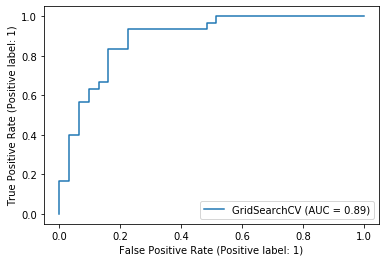

In [57]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg_gs,x_test,y_test);

In [58]:
y_pred= log_reg_gs.predict(x_test)

In [59]:
y_pred.shape


(61,)

In [60]:
y_test.shape

(61,)

In [61]:
print(confusion_matrix(y_test,y_pred))

[[23  8]
 [ 2 28]]


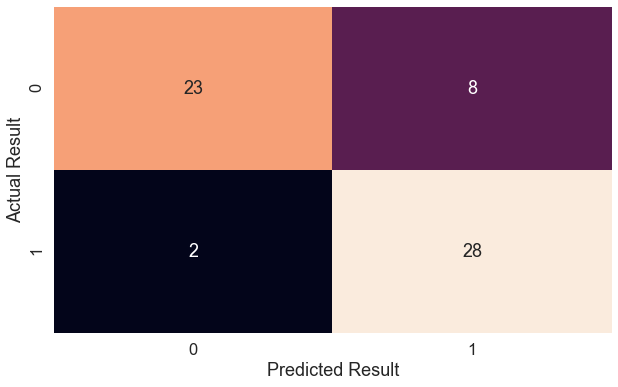

In [62]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_pred):
    """
    Plots a nice and easily understandable confusion matrix using seaborn's heatmap.
    
    """
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.ylabel("Actual Result")
    plt.xlabel("Predicted Result")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom + 0.5,top - 0.5)
plot_conf_mat(y_test,y_pred)

    
    
    

Now we have got a ROC curve , an AUC metric and a confusion matrix ,lets get a classification report as well cross validated precision , recall and f1-score.

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [64]:
#CALCULATE EVALUATION METRICS USING CROSS VALIDATION
#First get the best parameters for your model
log_reg_gs.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [65]:
clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
# CROSS-VALIDATED ACCURACY
cv_accuracy=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [66]:
# CROSS-VALIDATED PRECISION
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [67]:
# CROSS-VALIDATED recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [68]:
# CROSS-VALIDATED f1_score
cv_f1_score=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [69]:
#Lets visualize cross validated metrics
cv_metric=pd.DataFrame({"Accuracy":cv_accuracy,"Precison":cv_precision,"Recall":cv_recall,"f1_score":cv_f1_score},index=[0])
cv_metric

,Accuracy,Precison,Recall,f1_score
0,0.844699,0.820794,0.921212,0.867301


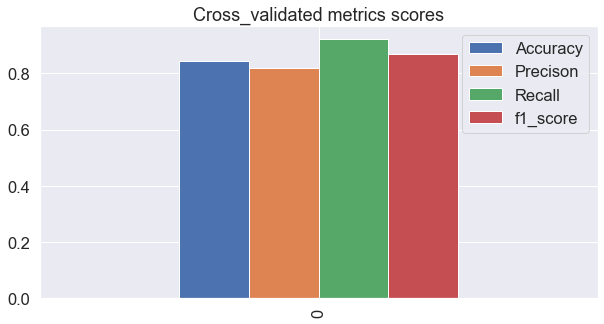

In [70]:
cv_metric.plot.bar(title="Cross_validated metrics scores",figsize=(10,5));

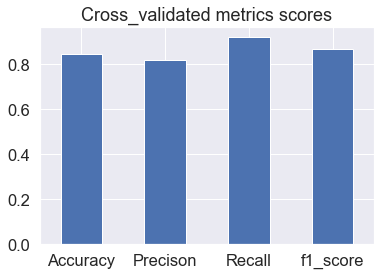

In [71]:
cv_metric.T.plot.bar(title="Cross_validated metrics scores",legend=False)
plt.xticks(rotation=0);

# FEATURE IMPORTANCE
* Which features contributed most to the outcomes of the model and how did they contribute ?
* Finding feature importance is different for each ML model.

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
log_reg_gs.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [74]:
# First instantiate the model.
clf=LogisticRegression(C=0.7278953843983146,
                      solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [76]:
clf.coef_

array([[ 1.02238308e-02, -8.74014799e-01,  9.33440127e-01,
        -1.25173771e-02, -7.02156891e-04, -1.15428658e-01,
         8.01514849e-01,  2.03697986e-02, -7.72192726e-01,
        -5.65913431e-01,  7.13177818e-01, -7.69357825e-01,
        -9.34356427e-01]])

In [78]:
feature_dict=dict(zip(df.columns,list(clf.coef_)))
feature_dict

{'age': array([ 1.02238308e-02, -8.74014799e-01,  9.33440127e-01, -1.25173771e-02,
        -7.02156891e-04, -1.15428658e-01,  8.01514849e-01,  2.03697986e-02,
        -7.72192726e-01, -5.65913431e-01,  7.13177818e-01, -7.69357825e-01,
        -9.34356427e-01])}

In [79]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0]))) 
"""
How much each of these columns contribute to predict columns.
"""

In [80]:
feature_dict

{'age': 0.010223830808240695,
 'sex': -0.8740147992330128,
 'cp': 0.9334401274442538,
 'trestbps': -0.012517377092596363,
 'chol': -0.0007021568914782256,
 'fbs': -0.11542865832254078,
 'restecg': 0.801514848559294,
 'thalach': 0.020369798646957496,
 'exang': -0.7721927263734012,
 'oldpeak': -0.565913431039713,
 'slope': 0.713177817594053,
 'ca': -0.7693578249856545,
 'thal': -0.9343564269042117}

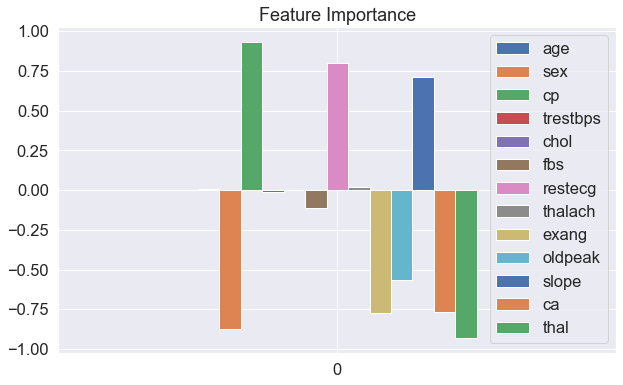

In [88]:
#Visualize feature importance using bar plot.
feature_df=pd.DataFrame(feature_df,index=[0])
feature_df.plot.bar(title="Feature Importance",figsize=(10,6))
plt.xticks(rotation=0);


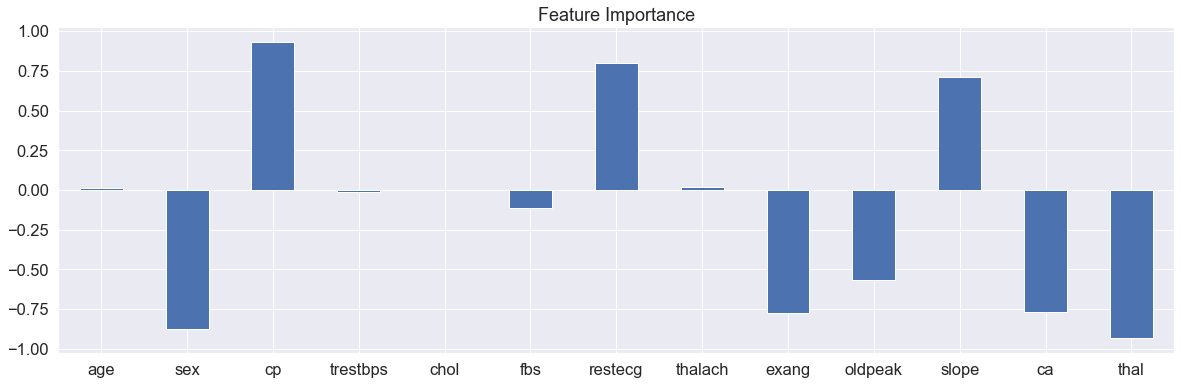

In [91]:
feature_df.T.plot.bar(title="Feature Importance",figsize=(20,6),legend=False)
plt.xticks(rotation=0);
# could still achieve the same performance with using the features that offer the most value.
# we shold focus on features with high coeff_of_corr . Be it positive or negative.

In [84]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.010224,-0.874015,0.93344,-0.012517,-0.000702,-0.115429,0.801515,0.02037,-0.772193,-0.565913,0.713178,-0.769358,-0.934356


In [93]:
pd.crosstab(df.sex,df.target)
#You can see for 0 there is 1/3 of ratio but for 1 as value of sex increases , target and sex becomes almost 50-50 ratio.

target,0,1
sex,,
0,24,72
1,114,93


In [94]:
pd.crosstab(df.slope,df.target)
# So as the slope value increases it means the model is more likely to predict a higher value of the target.

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Experimentation
**If you haven't hit your evaluation metric yet .... ask yourself ...**
* Could you collect more data ? 
* Could you try a better model ? like CatBoost or Xgboost ?
* Could you improve the current models ? (Beyond what've done so far)  

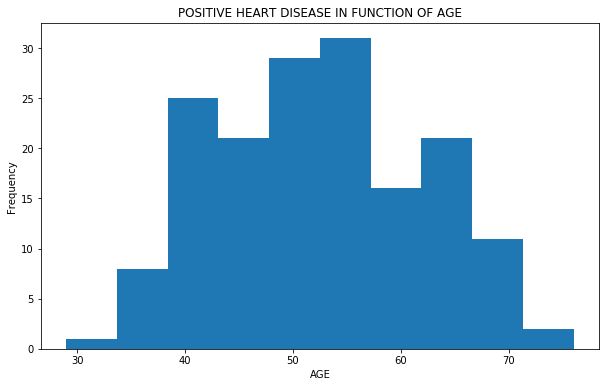

In [22]:
#EXTRA PRACTICE
df.age[df.target==1].plot.hist(figsize=(10,6))
plt.title("POSITIVE HEART DISEASE IN FUNCTION OF AGE")
plt.xlabel("AGE")
plt.ylabel("Frequency");